# Week 6 HW : PCA & FA

## 1. EDA

In [1]:
# Week 3에서 했던 것을 그대로 가져와보자.

import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv('Wine.csv', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.columns = ['Name', 
                'Alcohol', 
                'MalicAcid', 
                'Ash', 
                'AlcalinityOfAsh', 
                'Magnesium', 
                'TotalPhenols', 
                'Flavanoids', 
                'NonFlavanoidPhenols', 
                'Proanthocyanins', 
                'ColorIntensity', 
                'Hue', 
                'OD280/OD315', 
                'Proline']
# Week 3에서는 Feature Selection 시 변수를 선정해서 변수의 이름 지정하는 것이 중요
# 그러나 PCA, FA에서는 변수들을 조합해버리기 때문에 별 의미가...없다...

wine.info() # Cheking NA value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Name                   178 non-null int64
Alcohol                178 non-null float64
MalicAcid              178 non-null float64
Ash                    178 non-null float64
AlcalinityOfAsh        178 non-null float64
Magnesium              178 non-null int64
TotalPhenols           178 non-null float64
Flavanoids             178 non-null float64
NonFlavanoidPhenols    178 non-null float64
Proanthocyanins        178 non-null float64
ColorIntensity         178 non-null float64
Hue                    178 non-null float64
OD280/OD315            178 non-null float64
Proline                178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
wine.describe()

,Name,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonFlavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,1.938,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.775,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,1.000,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,1.000,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,2.000,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,3.000,13.678,3.083,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,3.000,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


## 2. PCA

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine.iloc[:,1:] 
y = wine.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14, stratify = y)

# PCA 시 Standard Scaling이 필수!
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [6]:
# 가장 큰 고유값들 순서로 뽑아내보자.

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=wine.columns[1:])
cov_mat = np.cov(X_train_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals_ = sorted(eig_vals, reverse = True)
eig_vals_

[4.928023691631202,
 2.4738364033982143,
 1.4893951372526286,
 0.985696111486994,
 0.8517559482742454,
 0.5858180912927305,
 0.4365298556460181,
 0.34368180802571124,
 0.2923261011198424,
 0.2569821861134573,
 0.20024556720107642,
 0.16975454422410577,
 0.09164561124435035]

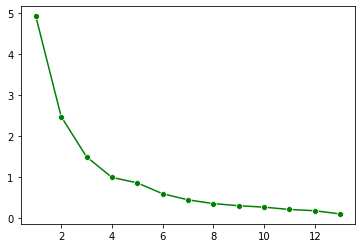

In [7]:
# visualization of eigenvalues

sns.lineplot(x = range(1, 14), y = eig_vals_, color = 'g', marker = 'o')

In [8]:
from sklearn.decomposition import PCA
pca = PCA() 
X_pca = pca.fit_transform(X_train_scaled) 

np.cumsum(pca.explained_variance_ratio_) 

# PC의 개수는 eigenvalue > 1 이거나 누적 explained variance > 최소 70~80% 인 지점을 선택해준다.
# eigenvalue > 1 이면 component 3개이나 그러면 explained variance가 작다. 따라서 4개 선정.

array([0.376, 0.565, 0.678, 0.754, 0.819, 0.863, 0.897, 0.923, 0.945,
       0.965, 0.98 , 0.993, 1.   ])

In [9]:
# Pipeline을 통해서 한꺼번에 돌려보자.
# Logistic Regression

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression as LR

pca_pipe_1 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 4)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_1.fit(X_train, y_train)

print('Logit Train - PCA :', pca_pipe_1.score(X_train, y_train))
print('Logit Test - PCA :', pca_pipe_1.score(X_test, y_test))

Logit Train - PCA : 1.0
Logit Test - PCA : 0.9259259259259259


In [10]:
# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca_pipe_2 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 4)),
                    ('estimator', LDA())])
pca_pipe_2.fit(X_train, y_train)

print('LDA Train - PCA :', pca_pipe_2.score(X_train, y_train))
print('LDA Test - PCA :', pca_pipe_2.score(X_test, y_test))

LDA Train - PCA : 0.9596774193548387
LDA Test - PCA : 0.9074074074074074


In [11]:
# QDA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
pca_pipe_3 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 4)),
                    ('estimator', QDA())])
pca_pipe_3.fit(X_train, y_train)

print('QDA Train - PCA :', pca_pipe_3.score(X_train, y_train))
print('QDA Test - PCA :', pca_pipe_3.score(X_test, y_test))

QDA Train - PCA : 0.9838709677419355
QDA Test - PCA : 0.8888888888888888


PC를 4개 선정했을 때 optimal한 방식은 Logistic Regression으로 보인다. 
Logistic Regression에서 굳이 polynomial features를 안해본 이유는...QDA test score가 제일 낮아서...

## 3. FA

In [12]:
# PCA하듯 FA도 해주면 된다.

from sklearn.decomposition import FactorAnalysis as FA

fa = FA()
X_fa = fa.fit_transform(X)

In [13]:
df_fa = pd.DataFrame(data=X_fa)
df_fa.head()

# Factor는 7개로 선정해준다.

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.014,1.635,-0.973,-0.188,0.675,0.282,-0.224,0.0,0.0,0.0,0.0,0.0,0.0
1,0.965,-0.411,-1.859,-0.935,-0.337,0.218,-0.139,0.0,0.0,0.0,0.0,0.0,0.0
2,1.395,-0.495,0.211,0.645,0.470,0.110,0.126,0.0,0.0,0.0,0.0,0.0,0.0
3,2.335,0.016,0.223,0.008,0.941,0.205,0.215,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.037,1.410,0.093,0.744,0.434,0.305,-0.592,0.0,0.0,0.0,0.0,0.0,0.0


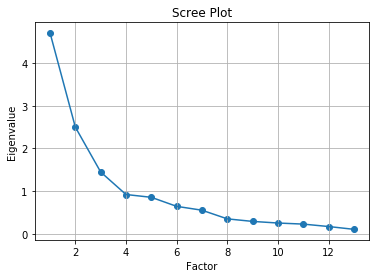

In [14]:
# LAB에 있는 것 그대로 돌려보기.

from factor_analyzer import FactorAnalyzer
fa_1 = FactorAnalyzer(rotation='varimax')
fa_1.fit(X)
ev, v = fa_1.get_eigenvalues()
xvals = range(1, X.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [15]:
# Logistic Regression

pca_pipe_4 = Pipeline([('fa', FA(n_components = 7)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_4.fit(X_train, y_train)
pca_pipe_4.score(X_test, y_test)

print('Logit Train - FA :', pca_pipe_4.score(X_train, y_train))
print('Logit Test - FA :', pca_pipe_4.score(X_test, y_test))

Logit Train - FA : 1.0
Logit Test - FA : 0.9074074074074074


In [16]:
# LDA

pca_pipe_5 = Pipeline([('fa', FA(n_components = 7)), ('estimator', LDA())])
pca_pipe_5.fit(X_train, y_train)

print('LDA Train - FA :', pca_pipe_5.score(X_train, y_train))
print('LDA Test - FA :', pca_pipe_5.score(X_test, y_test))

LDA Train - FA : 0.9838709677419355
LDA Test - FA : 0.9259259259259259


In [17]:
# QDA

pca_pipe_6 = Pipeline([('fa', FA(n_components = 7)), ('estimator', QDA())])
pca_pipe_6.fit(X_train, y_train)

print('QDA Train - FA :', pca_pipe_6.score(X_train, y_train))
print('QDA Test - FA :', pca_pipe_6.score(X_test, y_test))

QDA Train - FA : 1.0
QDA Test - FA : 0.9814814814814815


Factor을 7개 선정했을 때 QDA가 제일 나은 방식으로 보인다. Quadratic일 때 score가 더 높으므로 여기서는 Logistic Regression w/ Polynomial Features까지도 고려를 해 보자.

In [18]:
# Logistic Regression w/ Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

pca_pipe_7 = Pipeline([('fa', FA(n_components = 7)), ('poly', PolynomialFeatures(degree = 2)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_7.fit(X_train, y_train)


pca_pipe_8 = Pipeline([('fa', FA(n_components = 7)), ('poly', PolynomialFeatures(degree = 3)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_8.fit(X_train, y_train)

print('Logit Poly2 Train - FA :', pca_pipe_7.score(X_train, y_train))
print('Logit Poly2 Test - FA :', pca_pipe_7.score(X_test, y_test))

print('Logit Poly3 Train - FA :', pca_pipe_8.score(X_train, y_train))
print('Logit Poly3 Test - FA :', pca_pipe_8.score(X_test, y_test))


Logit Poly2 Train - FA : 1.0
Logit Poly2 Test - FA : 0.9259259259259259
Logit Poly3 Train - FA : 1.0
Logit Poly3 Test - FA : 0.9074074074074074


하는 김에 3차까지 해보았으나 성능은 2차식에서 살짝 올라가나 3차에서는 그냥 그런 것으로 나타난다.

따라서 PCA에서는 Logistic Regression이, FA에서는 QDA가 가장 적합한 것으로 결론낼 수 있다.

## 4. Comparison with Past Analysis

Week 3에서의 Feature Selection은 Univariate Selection w/ SelectKBest, Feature Importance w/ ExtraTreesClassifier 두 가지 방법으로 중복 선정된 상위 5개의 변수를 선정한 후 각각 Logistic Regression, LDA, QDA를 적용해보았다. 

Logistic Regression의 경우 아래의 결과로 나온다.

Week 3
Logit Train : 0.9435 / Logit Test : 0.9630

PCA
Logit Train : 1.0 / Logit Test : 0.9259

FA
Logit Train : 1.0 / Logit Test : 0.9074

PCA나 FA의 경우 Train Set에서 완벽한 classification을 하지만 Test Set에서는 이보다 낮은 score을 갖는다. 하지만 Week 3에서는 Train Set에서는 다소 떨어지지만, Test에서 더 좋은 성능을 발휘한다고 할 수 있다.

LDA의 경우 아래의 결과로 나온다.

Week 3
LDA Train : 0.9113 / LDA Test : 0.9630

PCA
LDA Train : 0.9597 / LDA Test : 0.9074

FA
LDA Train : 0.9839 / LDA Test : 0.9259

전반적으로 Logistic Regression의 경우와 비슷하게 나타난다. Train Set의 경우 PCA, FA에서 높게 나타나지만 Test Set의 경우 Week 3이 더 좋은 성능을 내고 있음을 보여주고 있다. 그러나 Logistic Regression의 경우와 비교해서 PCA가 FA보다 성능이 조금 떨어지는 것으로 나타났다.

QDA의 경우 아래의 결과로 나온다.

Week 3
QDA Train : 0.9758 / QDA Test : 0.9815

PCA
QDA Train : 0.9839 / QDA Test : 0.8889

FA
QDA Train : 1.0 / QDA Test : 0.9815

Week 3와 FA가 전체에서 가장 좋은 Test Score을 보이고 있으며 PCA는 전체에서 가장 낮은 Test Score을 보이고 있다. 그러나 PCA는 PC를 4개 선정한 것에 비해 Week 3는 변수 5개, FA는 Factor 7개를 선정하였으므로 과적합의 문제가 있을 수 있다고 생각한다. 이는 더 많은 자료가 확보되었을 때의 Test Score로 확인이 가능할 것이다.